# MTH5001: Introduction to Computer Programming 2018/19

## Sample Final Report Project (with model solution):

## "Least Squares Regression"

### Instructions:

You must write your answers in this Jupyter Notebook, using either Markdown or Python code as appropriate. 

Your code must be well documented. As a rough guide, you should aim to include one line of comments for each line of code (but you may include more or fewer comments depending on the situation).

The total number of marks available is 100. Attempt all parts of all questions.

For this project, you are expected to write your code almost entirely 'from scratch'. 
You may use basic Python functions for manipulating lists (e.g. `len`, `append`), but you **may not** use the package `numpy`. 
You **may** use the package `matplotlib.pyplot` to draw plots.

### Marking of projects:

When writing up projects, good writing style is even more important than in written exams. According to the [advice](https://qmplus.qmul.ac.uk/mod/book/view.php?id=807735&chapterid=87786) in the student handbook,

> To get full marks in any assessed work (tests or exams) you must normally not only give the right answers but also explain your working clearly and give reasons for your answers by writing legible and grammatically correct English sentences. Mathematics is about logic and reasoned arguments and the only way to present a reasoned and logical argument is by writing about it clearly. Your writing may include numbers and other mathematical symbols, but they are not enough on their own. You should copy the writing style used in good mathematical textbooks, such as those recommended for your modules. **You can expect to lose marks for poor writing (incorrect grammar and spelling) as well as for poor mathematics (incorrect or unclear logic).**

### Plagiarism warning:

Your work will be tested for plagiarism, which is an assessment offence, according to the [School's policy on Plagiarism](https://qmplus.qmul.ac.uk/mod/book/view.php?id=807735&chapterid=87787). In particular, while only academic staff will make a judgement on whether plagiarism has occurred in a piece of work, we will use the plagiarism detection software "Turnitin" to help us assess how much of work matches other sources. You will have the opportunity to upload your work, see the Turnitin result, and edit your work once accordingly before finalising your submission.

You may summarise relevant parts of books, online notes, or other resources; for example, for this project the [lecture notes from Linear Algebra](https://qmplus.qmul.ac.uk/pluginfile.php/1206787/mod_resource/content/1/notes%202015-2016.pdf) may be useful.

However, you must use your own words as far as possible (within reason, e.g. you would not be expected to change the wording of a well-known theorem), and you **must** [reference](https://qmplus.qmul.ac.uk/mod/book/view.php?id=807735&chapterid=87793) any sources that you use (as we have done in this model solution, e.g. in the solution to question 4). Similarly, if you decide to work with other students on parts of the project, then you **must** write up your work individually. You should also note that some of the questions are personalised in the sense that you will need to import and manipulate data that will be unique to you (i.e. no other student will have the same data).

## Background information

In many applications, we might be given a set of data points

$$(x_1,y_1), (x_2,y_2), \ldots, (x_n,y_n)$$

in the $x,y$-plane, and required to determine whether there is a relationship between the $x$ variable and the $y$ variable. 
For example, a financial analyst might need to determine whether there is a relationship between two stock prices, while a climate scientist might need to know whether temperatures are related to levels of a certain pollutant in the atmosphere.

A common way to determine whether two data sets $x_1, x_2, \ldots, x_n$ and $y_1, y_2, \ldots, y_n$ are related is to find a function

$$y = f(x)$$

that 'best fits' the data, so that each $y_i$ is approximately equal to $f(x_i)$, with very small error. 
The function $f(x)$ usually depends on certain parameters for which we need to solve. 
For example, to determine whether the $x$- and $y$-variables have a linear relationship, we would use a linear function

$$f(x) = a_0 + a_1 x$$

and try to find the parameters $a_0$ and $a_1$ that make $f(x)$ 'best fit' the data. 
This means that we want to find the coefficients $a_0$ and $a_1$ for which the quantity

$$SSE = \sum_{i=1}^n (y_i - f(x_i))^2$$

is as small as possible. 
In other words, we want to minimise the sum of squares of the errors (or "SSE") between the actual $y$-values (the $y_i$) and the $y$-values 'predicted' by substituting the corresponding $x_i$ values into the equation $y = f(x)$.

This process is called **linear least squares regression**, or simply **linear regression**. 
More generally, **polynomial (least squares) regression** involves assuming that

$$f(x) = a_0 + a_1 x + a_2 x^2 + \cdots + a_m x^m$$

for some integer $m \geq 2$, and finding the parameters $a_0, a_1, a_2 \ldots, a_m$ that minimise SSE.

## The project

Your project is to write and test Python code for polynomial regression. 

As noted in the "instructions" above, you are expected to write your code 'from scratch'. 
You may use basic Python functions for manipulating lists (e.g. `len`, `append`), but you **may not** use the package `numpy`. 
You **may** use the package `matplotlib.pyplot` to draw plots.

Bearing this in mind, you should structure your report as follows:

### Part I: Auxiliary code

In Parts II-IV (below), you will need to use matrix algebra to solve least squares regression problems. (You learned how to do this in your second-year linear algebra module; if you don't remember the details, you will need to do some revision/reading.) Therefore, you will first need to write some Python functions to perform basic matrix operations.

Your code should assume that matrices are represented as nested lists, e.g. the matrices 
$$\left[ \begin{array}{ll} 1&2 \\ 3&4 \\ 5&6 \end{array} \right] \quad \text{and} \quad 
\left[ \begin{array}{l} 7 \\ 8 \end{array} \right]$$
would be input and/or output as the nested lists `[[1, 2], [3, 4], [5, 6]]` and `[[7], [8]]`, respectively.

**1. [5 marks]** Write a function `matrix_transpose` which computes the transpose of a matrix. 

**2. [5 marks]** Write a function `matrix_multiplication` which computes the (matrix) product of two matrices.

**3. [10 marks]** Write a function `matrix_system_solver` which solves a system of linear equations of the form $A\mathbf{x} = \mathbf{b}$ for the vector $\mathbf{x}$. 
You may restrict to the case where the (input) matrix $A$ is square, and assume that the system has a unique solution. (These assumptions will be valid when you use your code in Parts II-IV.)

Again, you must write your functions 'from scratch', using their mathematical definitions. In the submitted report,
you **must not** use any `numpy` functions (e.g. `matmul` for matrix multiplication) which would obviously 'short cut' your code, but you may use basic functions for manipulating lists (e.g. `len`, `append`). 
(If in doubt about what is allowed, please ask.) Of course, when testing your code, it might be a good idea to compare your result with the one produced by `numpy` functions to detect any errors.

### Part II: Linear regression

**4. [10 marks]** Write a brief review of linear regression, explaining, in particular, how one finds the parameters $a_0$ and $a_1$ described above.

**5. [10 marks]** Write a function `least_squares_solver_linear` which calculates the linear regression coefficients for an input data set. The input of your function must be a list of the form `[[x1, y1], [x2, y2], ... , [xn, yn]]`, to represent a set of data points $(x_1,y_1), (x_2,y_2), \ldots, (x_n,y_n)$. The output should be a list of the form `[[a0], [a1]]` containing the corresponding coefficients $a_0$ and $a_1$ (in that order).

**6. [5 marks]** Run the function `data_linear` from the file "data.py". The input must be your student ID, enterred as a string, e.g. `data1('abc123')`; the output will be a set of $n$ data points, in the form of a list as described in question 5. Use your function from question 5 to calculate the linear regression coefficients $a_0$ and $a_1$ for this data, and display the data and the line of best fit on a single, well-labelled plot.

### Part III: Quadratic regression

**7. [10 marks]** Explain how to extend linear regression to quadratic regression (i.e. to the case $m=2$).

**8. [10 marks]** Write a function `least_squares_solver_quadratic` which calculates the quadratic regression coefficients for an input data set. The input should have the same form as in question 5. The output should be a list of the form `[[a0], [a1], [a2]]` containing the corresponding coefficients $a_0$, $a_1$ and $a_2$ (in that order).

**9. [5 marks]** Run the function `data_quadratic` from the file "data.py". The input must be your student ID, enterred as a string, e.g. `data1('abc123')`; the output will be a set of $n$ data points, in the form of a list as described in question 5. Use your function from question 8 to calculate the quadratic regression coefficients $a_0$, $a_1$ and $a_2$ for this data, and display the data and the best-fit quadratic polynomial on a single, well-labelled plot.

### Part IV: General polynomial regression

**10. [10 marks]** Explain how to extend linear and quadratic regression to general polynomial regression.

**11. [10 marks]** Write a function `least_squares_solver_polynomial` which takes as input a data set (in the same form as in question 5) and the degree $m$ of a polynomial (a positive integer), and computes the corresponding polynomial regression coefficients $a_0, a_1, a_2, \ldots, a_m$. The output of your function should be a list of the form `[[a0], [a1], [a2], ..., [am]]` containing the $m+1$ coefficients $a_0, a_1, a_2, \ldots, a_m$ in that order.

**12. [10 marks]** Run the function `data_polynomial` from the file "data.py". The input must be your student ID, enterred as a string, e.g. `data1('abc123')`; the output will be a set of $n$ data points, in the form of a list as described in question 5. Use your function from question 11 for $m=3,4,5,6$ to calculate the regression coefficients $a_0, a_1, \cdots, a_m$ for this data, and display the data and the best-fit polynomials on four well-labelled plot.
Decide which fit is the best and explain why.

\pagebreak

## Model solution

### Part I: Auxiliary code

**1. [5 marks]** Write a function `matrix_transpose` which computes the transpose of a matrix. 

In [1]:
def matrix_transpose(A):
    "Returns the transpose of the input matrix A."
    # calculate the number of rows and columns in A
    rows_in_A = len(A)
    cols_in_A = len(A[0])
    # initialise a list to represent A transpose
    AT = []
    # A transpose has cols_of_A rows: fill them in row by row
    for i in range(cols_in_A):
        AT.append([A[j][i] for j in range(rows_in_A)])
    return AT

In [2]:
# test an example
matrix=[[1.0, 2.0], [3.0, 4.0], [5.0, 6.0]]
print(*matrix, sep='\n')
print()
print(*matrix_transpose(matrix), sep='\n')

[1.0, 2.0]
[3.0, 4.0]
[5.0, 6.0]

[1.0, 3.0, 5.0]
[2.0, 4.0, 6.0]


**2. [5 marks]** Write a function `matrix_multiplication` which computes the (matrix) product of two matrices.

In [3]:
def matrix_multiplication(A, B):
    "Returns the matrix product of the input matrices."
    # calculate the number of rows and columns in AB
    # AB has the same number of rows as A, and the same number of columns as B
    rows = len(A)
    cols = len(B[0])
    # initialise a nested list of length rows to represent the matrix product AB
    AB = [[] for i in range(rows)]
    # calculate the number of rows in B (equivalently, the number of columns in A)
    m = len(B)
    # fill in each row of AB using the definition of matrix multiplication
    for i in range(rows):
        for j in range(cols):
            # fill in entry (i,j) of AB
            AB[i].append(sum([A[i][k]*B[k][j] for k in range(m)]))
    return AB

In [4]:
# test an example
matrix1=[[1.0, 0.0], [0.0, 1.0], [1.0, 0.0]]
matrix2=[[1.0, 0.0, -1.0], [0.0, 1.0, 0.0]]
print(*matrix1, sep='\n')
print()
print(*matrix2, sep='\n')
print()
print(*matrix_multiplication(matrix1,matrix2), sep='\n')

[1.0, 0.0]
[0.0, 1.0]
[1.0, 0.0]

[1.0, 0.0, -1.0]
[0.0, 1.0, 0.0]

[1.0, 0.0, -1.0]
[0.0, 1.0, 0.0]
[1.0, 0.0, -1.0]


**3. [10 marks]** Write a function `matrix_system_solver` which solves a system of linear equations of the form $A\mathbf{x} = \mathbf{b}$ for the vector $\mathbf{x}$. 
You may restrict to the case where the (input) matrix $A$ is square, and assume that the system has a unique solution. 

In [5]:
def matrix_system_solver(A, b): 
    
    """
    Solves the system of linear equations Ax=b for x.
    Code adapted from:
    https://martin-thoma.com/solving-linear-equations-with-gaussian-elimination/
    """
    
    # calculate the number of rows and columns in A (assuming A is square)
    n = len(A)
    
    # construct the augmented matrix M=[A|b]
    # intialise a nested list to represent M
    M = [[] for i in range(n)]
    # fill in one row at a time
    for i in range(n):
        # fill in each entry in the current row
        for j in range(n):
            # fill in the (i,j) entry of A
            M[i].append(A[i][j])
        # put coordinate i of the vector b in the final column of M
        M[i].append(b[i][0])

    # begin Gaussian elimination
    # look at the columns of M one by one
    for i in range(n):
        # find the largest absolute value element in the 
        # current column (column i) in row i or below
        max_element = abs(M[i][i])
        max_row = i
        for k in range(i+1, n):
            if abs(M[k][i]) > max_element:
                max_element = abs(M[k][i])
                max_row = k
        # swap the 'maximum' row with row i
        for k in range(i, n+1):
            element_to_swap = M[max_row][k]
            M[max_row][k] = M[i][k]
            M[i][k] = element_to_swap
        # apply row operations to make all entries below row i in column i zero
        for k in range(i+1, n):
            # define the constant term in the row operation
            constant = -M[k][i]/M[i][i]
            # apply the row operation "R_k -> R_k+constant*R_i" column by column 
            for j in range(i, n+1):
                if j == i:
                    M[k][j] = 0
                else:
                    M[k][j] = M[k][j] + (constant * M[i][j])
    # end Gaussian elimination

    # begin back substitution
    # initialise a nested list to represent the solution vector x
    x = [[] for i in range(n)]
    # start at row n of the augmented matrix M and work up
    for i in range(n-1, -1, -1):
        # fill in coordinate i of x
        x[i].append(M[i][n]/M[i][i])
        # update 'b' values before next step of outer loop so that
        # x[i] will be correctly computed via the above line of code 
        # on the next pass
        for k in range(i-1, -1, -1):
            M[k][n] = M[k][n] - (M[k][i] * x[i][0])
    # end back substitution
    
    return x

In [6]:
# test an example
example_A,example_b = [[1.0, 1.0], [1.5, 1.0]],[[2.0], [1.0]]
example_x = matrix_system_solver(example_A, example_b)
example_Ax = matrix_multiplication(example_A, example_x)
print(*example_A,sep='\n')
print()
print(*example_b,sep='\n')
print()
print(*example_x,sep='\n')
print()
print(*example_Ax,sep='\n')

[1.0, 1.0]
[1.5, 1.0]

[2.0]
[1.0]

[-2.0]
[4.0]

[2.0]
[1.0]


### Part II: Linear regression

**4. [10 marks]** Write a brief review of linear regression, explaining, in particular, how one finds the parameters $a_0$ and $a_1$ described above.

We use the notation introduced in the "Background information" section above. 
Given the data points $(x_1,y_1), (x_2,y_2), \ldots, (x_n,y_n)$, consider the matrices

$$X = \left[ \begin{array}{ll} 1&x_0 \\ 1&x_1 \\ \vdots&\vdots \\ 1&x_n \end{array} \right], \quad
\mathbf{y} = \left[ \begin{array}{l} y_1 \\ y_2 \\ \vdots \\ y_n \end{array} \right], \quad \text{and} \quad
\mathbf{a} = \left[ \begin{array}{l} a_0 \\ a_1 \end{array} \right].$$

Then, by definition of matrix multiplication, we have

$$SSE = ||\mathbf{y} - X\mathbf{a}||^2,$$

where $||\cdot||$ is the usual Euclidean norm of a vector. 
We need to choose the vector $\mathbf{a}$ such that SSE is minimised. 
In other words, $\mathbf{a}$ should be a *least squares solution* of the system of linear equations

$$X\mathbf{a} = \mathbf{y}.$$

By using the theory of orthogonal projections from linear algebra, it can be shown that $\mathbf{a}$ must therefore be an (actual) solution of the corresponding *normal equations*, i.e. the system of linear equations

$$(X^TX)\mathbf{a} = X^T\mathbf{y}.$$

A detailed proof may be found in, e.g. Theorem 6.33 on p.71 of the following linear algebra notes:

https://qmplus.qmul.ac.uk/pluginfile.php/1206787/mod_resource/content/1/notes%202015-2016.pdf

In summary, starting with our data set, we should form the matrices $X$ and $\mathbf{y}$ as above, and solve the system of equations $(X^TX)\mathbf{a} = X^T\mathbf{y}$ for the vector $\mathbf{a}$.

**5. [10 marks]** Write a function `least_squares_solver_linear` which calculates the linear regression coefficients for an input data set. The input of your function must be a list of the form `[[x1, y1], [x2, y2], ... , [xn, yn]]`, to represent a set of data points $(x_1,y_1), (x_2,y_2), \ldots, (x_n,y_n)$. The output should be a list of the form `[[a0], [a1]]` containing the corresponding coefficients $a_0$ and $a_1$ (in that order).

In [7]:
def least_squares_solver_linear(data):
    """
    Returns a list [a0, a1] of coefficients of the line of best fit 
    y = a0 + a1*x for linear least squares regression.
    """
    # calculate the number of data points
    n = len(data)
    # construct the matrix X
    X = [[1, data[i][0]] for i in range(n)]
    # construct the matrix (vector) y
    y = [[data[i][1]] for i in range(n)]
    # construct the transpose of X, giving it the variable name "XT"
    XT = matrix_transpose(X)
    # construct X^TX (the product of X transpose and X)
    XTX = matrix_multiplication(XT, X)
    # construct X^Ty (the product of X transpose and y)
    XTy = matrix_multiplication(XT, y)
    # solve the normal equations X^TXa = X^Ty for the vector a = (a0, a1)^T
    a = matrix_system_solver(XTX, XTy)
    return a

**6. [5 marks]** Run the function `data_linear` from the file "data.py". The input must be your student ID, enterred as a string, e.g. `data1('abc123')`; the output will be a set of $n$ data points, in the form of a list as described in question 5. Use your function from question 5 to calculate the linear regression coefficients $a_0$ and $a_1$ for this data, and display the data and the line of best fit on a single, well-labelled plot.

In [15]:
import data
# sort the data by x value (smallest to largest) to make plotting easier
data_linear = sorted(data.data_linear('abc123'))
sol_linear = least_squares_solver_linear(data_linear)
a0 = sol_linear[0][0]
a1 = sol_linear[1][0]
print('a0 =', a0)
print('a1 =', a1)

a0 = 5.9300338646719375
a1 = 10.097457919584377


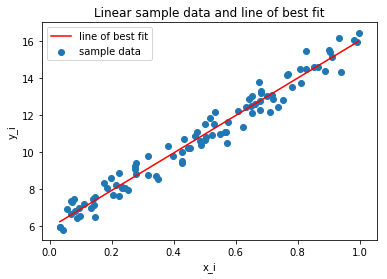

In [16]:
import matplotlib.pyplot as plt
# construct lists of x and y values from the data
xi_linear = [data_linear[i][0] for i in range(len(data_linear))]
yi_linear = [data_linear[i][1] for i in range(len(data_linear))]
# plot the (x,y) data
plt.scatter(xi_linear, yi_linear, label='sample data')
# construct a list of predicted y values using the line of best fit
yi_predicted_linear = [a0 + a1*xi_linear[i] for i in range(len(data_linear))]
# plot the line of best fit
plt.plot(xi_linear, yi_predicted_linear, color='red', label='line of best fit')
# add title/labels and show plot
plt.title('Linear sample data and line of best fit')
plt.xlabel('x_i')
plt.ylabel('y_i')
plt.legend()
plt.show()

### Part III: Quadratic regression

**7. [10 marks]** Explain how to extend linear regression to quadratic regression (i.e. to the case $m=2$).

Here we again use the notation introduced in the "Background information" section above. 
We now wish to fit a function

$$f(x) = a_0 + a_1x + a_2x^2$$

to our data points $(x_1,y_1), (x_2,y_2), \ldots, (x_n,y_n)$, in such a way that

$$SSE = ||y_i - f(x_i)||^2$$

is minimised.
If we now consider the matrices

$$X = \left[ \begin{array}{ll} 1&x_0&x_0^2 \\ 1&x_1&x_1^2 \\ \vdots&\vdots \\ 1&x_n&x_n^2 \end{array} \right], \quad
\mathbf{y} = \left[ \begin{array}{l} y_1 \\ y_2 \\ \vdots \\ y_n \end{array} \right], \quad \text{and} \quad
\mathbf{a} = \left[ \begin{array}{l} a_0 \\ a_1 \\ a_2 \end{array} \right],$$

then we again find that

$$SSE = ||\mathbf{y} - X\mathbf{a}||^2.$$

Therefore, $\mathbf{a}$ must again be chosen to be a least squares solution of the system

$$X\mathbf{a} = \mathbf{y},$$

and so we can again calculate $\mathbf{a}$ as a solution of the normal equations

$$(X^TX)\mathbf{a} = X^T\mathbf{y}.$$

This again follows from, e.g. Theorem 6.33 on p.71 of:

https://qmplus.qmul.ac.uk/pluginfile.php/1206787/mod_resource/content/1/notes%202015-2016.pdf

**8. [10 marks]** Write a function `least_squares_solver_quadratic` which calculates the quadratic regression coefficients for an input data set. The input should have the same form as in question 5. The output should be a list of the form `[[a0], [a1], [a2]]` containing the corresponding coefficients $a_0$, $a_1$ and $a_2$ (in that order).

In [10]:
def least_squares_solver_quadratic(data):
    """
    Returns a list [a0, a1, a2] of coefficients of best fit quadratic polynomial
    y = a0 + a1*x + a2*x**2 for quadratic least squares regression.
    """
    # calculate the number of data points
    n = len(data)
    # construct the matrix X
    X = [[1, data[i][0], data[i][0]**2] for i in range(n)]
    # construct the matrix (vector) y
    y = [[data[i][1]] for i in range(n)]
    # construct the transpose X
    XT = matrix_transpose(X)
    # construct X^TX
    XTX = matrix_multiplication(XT, X)
    # construct X^Ty
    XTy = matrix_multiplication(XT, y)
    # solve the normal equations X^TXa = X^Ty for the vector a = (a0, a1, a2)^T
    a = matrix_system_solver(XTX, XTy)
    return a

**9. [5 marks]** Run the function `data_quadratic` from the file "data.py". The input must be your student ID, enterred as a string, e.g. `data1('abc123')`; the output will be a set of $n$ data points, in the form of a list as described in question 5. Use your function from question 8 to calculate the quadratic regression coefficients $a_0$, $a_1$ and $a_2$ for this data, and display the data and the best-fit quadratic polynomial on a single, well-labelled plot.

In [11]:
import data
# sort the data by x value to make plotting easier
data_quadratic = sorted(data.data_quadratic('abc123'))
sol_quadratic = least_squares_solver_quadratic(data_quadratic)
a0 = sol_quadratic[0][0]
a1 = sol_quadratic[1][0]
a2 = sol_quadratic[2][0]
print('a0 =', a0)
print('a1 =', a1)
print('a2 =', a2)

a0 = 5.958828883180274
a1 = -0.8604354088089806
a2 = 4.850708443196404


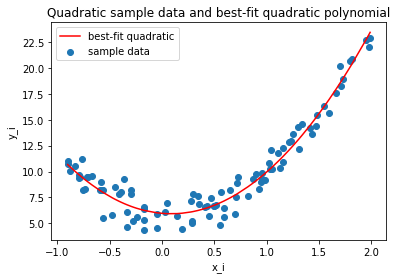

In [12]:
import matplotlib.pyplot as plt
# construct lists of x and y values from the data
xi_quadratic = [data_quadratic[i][0] for i in range(len(data_quadratic))]
yi_quadratic = [data_quadratic[i][1] for i in range(len(data_quadratic))]
# plot the (x,y) data
plt.scatter(xi_quadratic, yi_quadratic, label='sample data')
# construct a list of predicted y values using the quadrtic of best fit
yi_predicted_quadratic = [a0 + a1*xi_quadratic[i] + a2*xi_quadratic[i]**2 for i in range(len(data_quadratic))]
# plot the quadratic of best fit
plt.plot(xi_quadratic, yi_predicted_quadratic, color='red', label='best-fit quadratic')
# add title/labels and show plot
plt.title('Quadratic sample data and best-fit quadratic polynomial')
plt.xlabel('x_i')
plt.ylabel('y_i')
plt.legend()
plt.show()

### Part IV: General polynomial regression

**10. [10 marks]** Explain how to extend linear and quadratic regression to general polynomial regression.

In the general case, we wish to fit a function

$$f(x) = a_0 + a_1x + a_2x^2 + \cdots a_mx^m$$

to our data points $(x_1,y_1), (x_2,y_2), \ldots, (x_n,y_n)$, where $m$ is some (chosen but arbitrarily large) positive integer. 
Observe that $m=1$ for linear regression, and $m=2$ for quadratic regression. 
As in those previous cases, we once again need to minimise

$$SSE = ||y_i - f(x_i)||^2.$$

We now consider the matrices

$$X = \left[ \begin{array}{ll} 1&x_0&x_0^2&\cdots&x_0^m \\ 1&x_1&x_1^2&\cdots&x_1^m \\ \vdots&\vdots \\ 1&x_n&x_n^2&\cdots&x_n^m \end{array} \right], \quad
\mathbf{y} = \left[ \begin{array}{l} y_1 \\ y_2 \\ \vdots \\ y_n \end{array} \right], \quad \text{and} \quad
\mathbf{a} = \left[ \begin{array}{l} a_0 \\ a_1 \\ a_2 \\ \vdots \\ a_m \end{array} \right],$$

and we again find that

$$SSE = ||\mathbf{y} - X\mathbf{a}||^2,$$

meaning that $\mathbf{a}$ should again be chosen to be a least squares solution of the system $X\mathbf{a} = \mathbf{y}$. 
Hence, we can once again find $\mathbf{a}$ by solving the normal equations

$$(X^TX)\mathbf{a} = X^T\mathbf{y}.$$

As before, this follows from, e.g. Theorem 6.33 on p.71 of:

https://qmplus.qmul.ac.uk/pluginfile.php/1206787/mod_resource/content/1/notes%202015-2016.pdf

**11. [10 marks]** Write a function `least_squares_solver_polynomial` which takes as input a data set (in the same form as in question 5) and the degree $m$ of a polynomial (a positive integer), and computes the corresponding polynomial regression coefficients $a_0, a_1, a_2, \ldots, a_m$. The output of your function should be a list of the form `[[a0], [a1], [a2], ..., [am]]` containing the $m+1$ coefficients $a_0, a_1, a_2, \ldots, a_m$ in that order.

In [13]:
def least_squares_solver_polynomial(data, m):
    """
    Returns a list [a0, a1, a2, ..., am] of coefficients of best fit polynomial
    y = a0 + a1*x + a2*x**2 + ... + am*x**m for general polynomial least squares regression.
    """
    # calculate the number of data points
    n = len(data)
    # construct the matrix X column by column
    # column 1 contains all 1's
    X = [[1] for i in range(n)]
    # construct the other columns
    for j in range(1,m+1):
        for i in range(n):
            X[i].append(data[i][0]**j)
    # construct the matrix (vector) y
    y = [[data[i][1]] for i in range(n)]
    # construct the transpose X, X^TX and X^Ty
    XT = matrix_transpose(X)
    XTX = matrix_multiplication(XT, X)
    XTy = matrix_multiplication(XT, y)
    # solve X^TXa = X^Ty for the vector a = (a0, a1, a2, ..., am)^T
    a = matrix_system_solver(XTX, XTy) 
    return a

**12. [10 marks]** Run the function `data_polynomial` from the file "data.py". The input must be your student ID, enterred as a string, e.g. `data1('abc123')`; the output will be a set of $n$ data points, in the form of a list as described in question 5. Use your function from question 11 for $m=3,4,5,6$ to calculate the regression coefficients $a_0, a_1, \cdots, a_m$ for this data, and display the data and the best-fit polynomials on four well-labelled plot.
Decide which fit is the best and explain why.

Fit polynomial of degree 2
(0, -13.977719581627102)
(1, -41.485967067578436)
(2, 26.97670993987832)


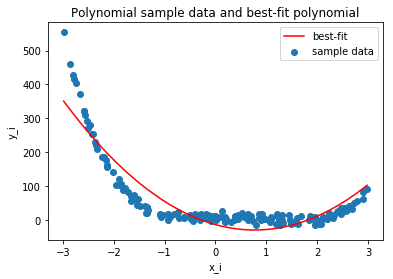

Fit polynomial of degree 3
(0, -18.04075284802625)
(1, 2.3996184866809522)
(2, 27.7566600865096)
(3, -8.660373874449565)


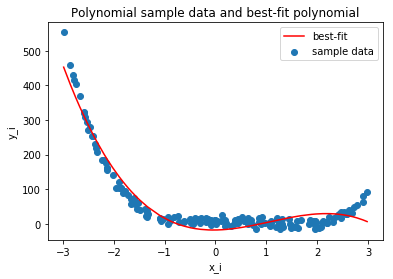

Fit polynomial of degree 4
(0, 7.254708645676855)
(1, 3.5959090898762516)
(2, -2.2022640445522423)
(3, -8.874037642144213)
(4, 4.134197375823866)


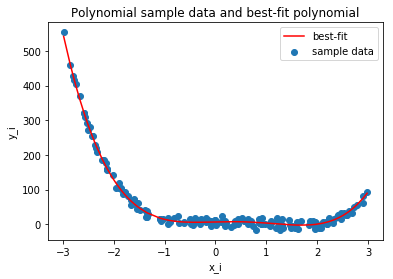

Fit polynomial of degree 5
(0, 7.377195386811065)
(1, 1.9462321614032478)
(2, -2.272640301682718)
(3, -8.002602273510474)
(4, 4.142279230755359)
(5, -0.09038823057283195)


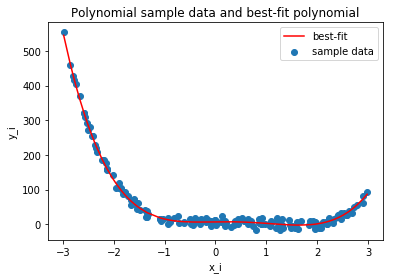

Fit polynomial of degree 6
(0, 7.12768892228693)
(1, 1.8878109901817341)
(2, -1.6473158807544555)
(3, -7.974763614188921)
(4, 3.927644348250834)
(5, -0.09321162080573961)
(6, 0.01801637277993302)


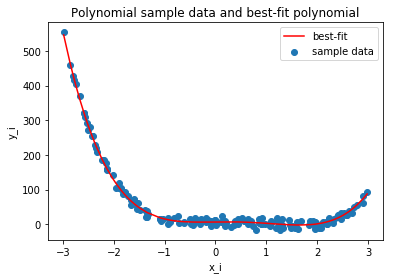

In [14]:
import data
import matplotlib.pyplot as plt
# sort the data by x value to make plotting easier
data_polynomial = sorted(data.data_polynomial('abc123'))
for m in range(2,7):
    sol_polynomial = least_squares_solver_polynomial(data_polynomial, m)
    sol=matrix_transpose(sol_polynomial)[0]
    print("Fit polynomial of degree", m)
    print(*zip(range(len(sol)),sol),sep='\n')
    # construct lists of x and y values from the data
    xi_polynomial = [data_polynomial[i][0] for i in range(len(data_polynomial))]
    yi_polynomial = [data_polynomial[i][1] for i in range(len(data_polynomial))]
    # plot the (x,y) data
    plt.scatter(xi_polynomial, yi_polynomial, label='sample data')
    # construct a list of predicted y values using the quintic of best fit
    yi_predicted_polynomial = [sum(
        [sol[j]*xi_polynomial[i]**j for j in range(m+1)]
    ) for i in range(len(data_polynomial))]
    # plot the quintic of best fit
    plt.plot(xi_polynomial, yi_predicted_polynomial, color='red', label='best-fit')
    # add title/labels and show plot
    plt.title('Polynomial sample data and best-fit polynomial')
    plt.xlabel('x_i')
    plt.ylabel('y_i')
    plt.legend()
    plt.show()

The fits for $m=2$ and $m=3$ do not match the data very well. The fits for $m=4$, $m=5$, and $m=6$ are nearly identical, moreover the coefficients of $x^5$ and $x^6$ are rather small, hence the best fitting polynomial is obtained for $m=4$.